In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import statsmodels.api as sm

# Allow matplotlib to plot graphs within the Jupyter notebook
%matplotlib inline

In [2]:
# Read entire csv file
data_raw = pd.read_csv('prosperLoanData.csv')

In [3]:
# See what the dataframe looks like
data_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


##### Interesting/Useful Metrics
- Term  (loan length in months)
- LoanStatus
- BorrowerAPR
- LenderYield
- ProsperRating (numeric) (for loans 2009 and after)
- ProsperScore   (risk assessment)
- EmploymentStatus   (T/F)
- EmploymentStatusDuration   (in months)
- IsBorrowerHomeowner
- CreditScoreRangeLower (The Upper credit score is +19 points across all the entries)
- StatedMonthlyIncome
- DelinquenciesLast7Years
- AmountDelinquent
- MonthlyLoanPayment   (monthly payment)
- LoanOriginalAmount   (original loan amount)







In [4]:
# Get rid of the space in the APR value
data_raw['ProsperRating_numeric'] = data_raw['ProsperRating (numeric)']

In [5]:
# Make a sliced version of the raw data to make handling easier.  Get all rows of the selected columns.

df = data_raw.loc[:, [
    'Term',
    #'LoanStatus',
    'BorrowerAPR',
    #'LenderYield',
    #'ProsperRating_numeric',
    'ProsperScore',
    'EmploymentStatus',
    #'EmploymentStatusDuration',
    'IsBorrowerHomeowner',
    'CreditScoreRangeLower',
    'StatedMonthlyIncome',
    'DelinquenciesLast7Years',
    'AmountDelinquent',
    'MonthlyLoanPayment',
    'LoanOriginalAmount',
]]

In [6]:
# Change the EmploymentStatus datatype to category
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')

In [7]:
# See the paired down dataframe
df

,Term,BorrowerAPR,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,StatedMonthlyIncome,DelinquenciesLast7Years,AmountDelinquent,MonthlyLoanPayment,LoanOriginalAmount
0,36,0.16516,NaN,Self-employed,True,640.0,3083.333333,4.0,472.0,330.43,9425
1,36,0.12016,7.0,Employed,False,680.0,6125.000000,0.0,0.0,318.93,10000
2,36,0.28269,NaN,Not available,False,480.0,2083.333333,0.0,NaN,123.32,3001
3,36,0.12528,9.0,Employed,True,800.0,2875.000000,14.0,10056.0,321.45,10000
4,36,0.24614,4.0,Employed,True,680.0,9583.333333,0.0,0.0,563.97,15000
...,...,...,...,...,...,...,...,...,...,...,...
113932,36,0.22354,5.0,Employed,True,700.0,4333.333333,7.0,0.0,364.74,10000
113933,36,0.13220,8.0,Employed,True,700.0,8041.666667,4.0,5062.0,65.57,2000
113934,60,0.23984,3.0,Employed,True,700.0,2875.000000,0.0,0.0,273.35,10000
113935,60,0.28408,5.0,Full-time,True,680.0,3875.000000,0.0,0.0,449.55,15000


In [8]:
# Get basic information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Term                     113937 non-null  int64   
 1   BorrowerAPR              113912 non-null  float64 
 2   ProsperScore             84853 non-null   float64 
 3   EmploymentStatus         111682 non-null  category
 4   IsBorrowerHomeowner      113937 non-null  bool    
 5   CreditScoreRangeLower    113346 non-null  float64 
 6   StatedMonthlyIncome      113937 non-null  float64 
 7   DelinquenciesLast7Years  112947 non-null  float64 
 8   AmountDelinquent         106315 non-null  float64 
 9   MonthlyLoanPayment       113937 non-null  float64 
 10  LoanOriginalAmount       113937 non-null  int64   
dtypes: bool(1), category(1), float64(7), int64(2)
memory usage: 8.0 MB


## Exploratory Graphing

## Univariate
Basic information about the distribution of important values for loan. Redlines are median values.

Q: What is the distribution of loan rates?

min       0.00653
median    0.20976
max       0.51229
Name: BorrowerAPR, dtype: float64


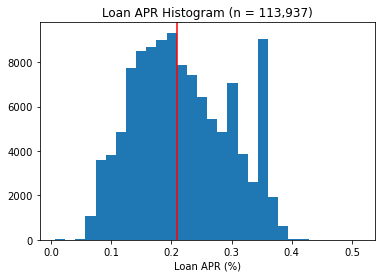

In [11]:
# Figure out the median loan rate
apr_median = df['BorrowerAPR'].median()

# Print out the "minimum", "median", and "maximum" loan rate values
print(df['BorrowerAPR'].agg(['min', 'median', 'max']) )

# Plot a vertical line (median value) and histogram of the loan rates
plt.axvline(apr_median, color = 'r')
plt.hist(df['BorrowerAPR'], bins = 30)
plt.xlabel('Loan APR (%)');
plt.title('Loan APR Histogram (n = 113,937)');

Q: What is the distribution of loan amounts?

6500.0


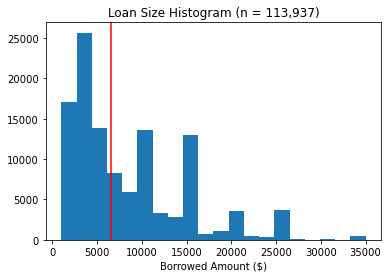

In [41]:
# Figure out the median amount of money borrowed
loan_amount_median = df['LoanOriginalAmount'].median()

# Print out the median amount of money borrowed
print(loan_amount_median)

# Plot a vertical line (median value) and histogram of the loan amounts
plt.axvline(loan_amount_median, color = 'r')
plt.hist(df['LoanOriginalAmount'], bins = 20)
plt.xlabel('Borrowed Amount ($)')
plt.title('Loan Size Histogram (n = 113,937)');

Q: How many of each loan term are there?

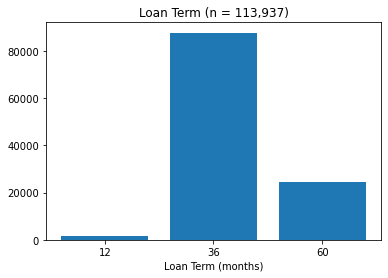

In [11]:
# Cut the loans into three series, depending on their length
g1_12 = len(df[ df['Term'] == 12 ]['Term'])
g1_36 = len(df[ df['Term'] == 36 ]['Term'])
g1_60 = len(df[ df['Term'] == 60 ]['Term'])

# Put the above three series into a list for easier plotting
data = [g1_12, g1_36, g1_60]

# Bar chart bin labels
label = ['12', '36', '60']

# Plot the bar chart
plt.bar(label, data)
plt.xlabel('Loan Term (months)')
plt.title('Loan Term (n = 113,937)');

What is the percentage of loan term?

In [12]:
# Figure out the percentage of each loan term
df['Term'].dropna().value_counts(normalize = True)

36    0.770408
60    0.215426
12    0.014166
Name: Term, dtype: float64

Q: What employment categories do people fall into?

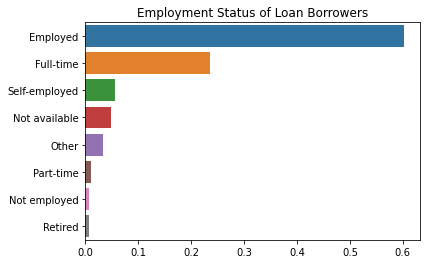

In [31]:
# Labels listed from dataframe
label = ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired']

# Plot the bar chart of EmploymentStatus
sb.barplot(x = df['EmploymentStatus'].value_counts(normalize = True), y = label)
plt.xlabel('')
plt.title('Employment Status of Loan Borrowers');

Q: What is the distribution of people's credit scores?

680.0


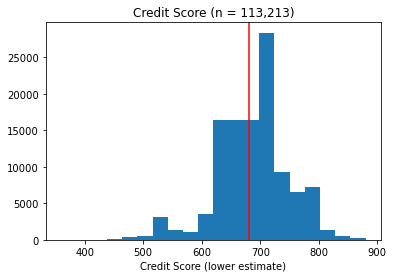

In [32]:
# Series of lower credit score values, excluding "0" (which is not a valid number) and "NaN"
csrl = df[ df['CreditScoreRangeLower'] > 0 ]['CreditScoreRangeLower']

# Figure out the median lower credit score value
median_csrl = csrl.median()

# Print out the median lower credit score value
print(median_csrl)

# Plot a vertical line (median value) and the histogram of lower credit score values
plt.hist(csrl, bins = 20)
plt.axvline(median_csrl, color = 'r')
plt.xlabel('Credit Score (lower estimate)')
plt.title('Credit Score (n = 113,213)');

Q: What is the distribution of risk scores that lenders assign to people?

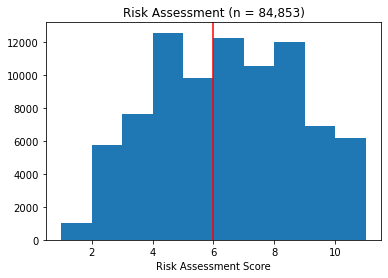

In [13]:
# Risk Assessment Score values, ".dropna()" removes existing "NaN" values.
p_score = df['ProsperScore'].dropna()

# Plot a vertical line (median value) and the histogram of the Risk Assessment Scores
plt.axvline(p_score.median(), color = 'r')
plt.hist(p_score)
plt.xlabel('Risk Assessment Score')
plt.title('Risk Assessment (n = 84,853)');

## Bivariate
- Go through combiniations of Loan Rate, Risk Assessment Score, and Credit Score.
- Linear Regression for Loan Rate and if a trend is not clear.

Correlation Plot, to see if something strongly stands out, or not.

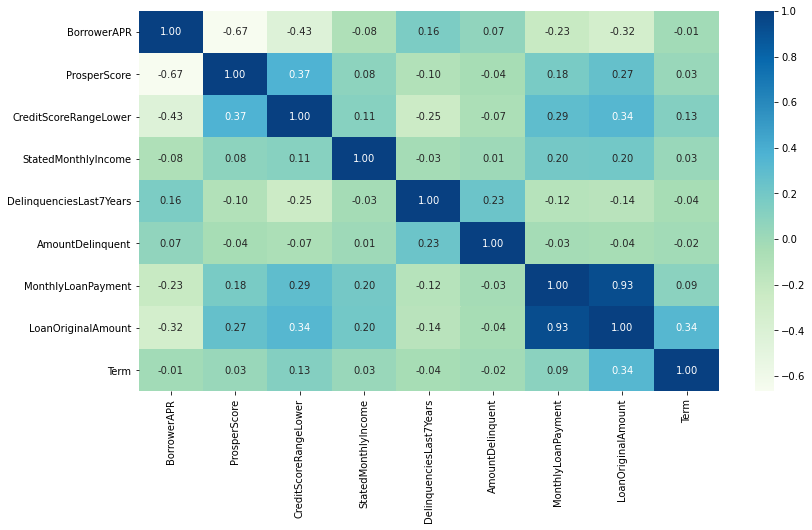

In [10]:
# Categories I am interested in comparing
categories = ['BorrowerAPR', 'ProsperScore',
              'CreditScoreRangeLower', 'StatedMonthlyIncome', 'DelinquenciesLast7Years', 
              'AmountDelinquent', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'Term']

plt.figure(figsize = [13,7])
sb.heatmap(df[categories].corr(), annot = True, cmap = 'GnBu', fmt = '.2f' )
plt.show()

Pairplot to see if there are strong/clear trends with any combination of variables.

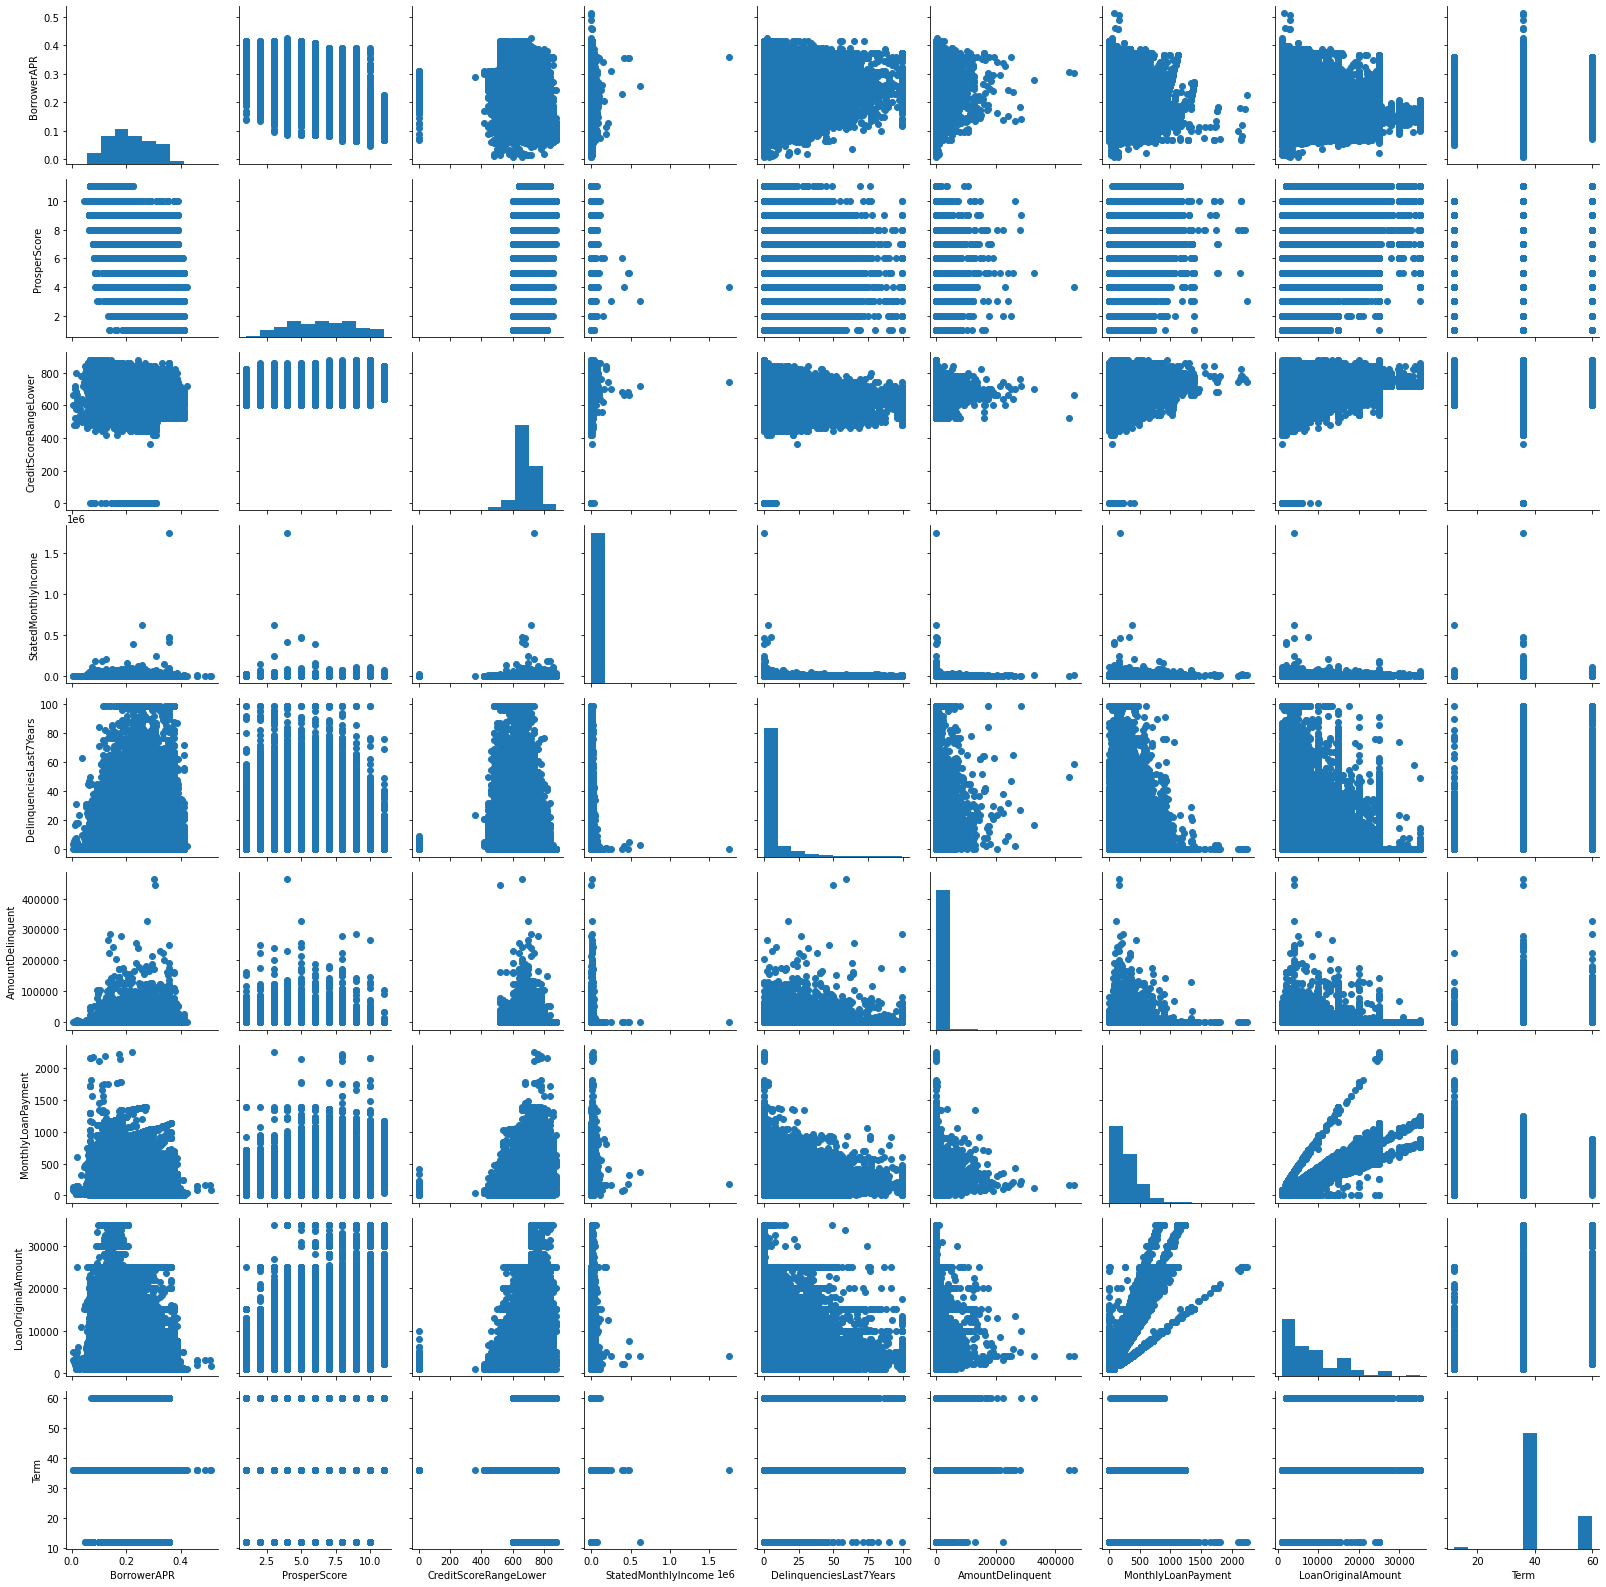

In [12]:
# Choose random samples of 250, to speed up graphing
samples = np.random.choice(df.shape[0], 250, replace = False )
data_samples = df.loc[samples, :]

# Make Pairplot of selected values from "categories"
f = sb.PairGrid(data = df, vars = categories)
f = f.map_diag(plt.hist, bins = 10)
f.map_offdiag(plt.scatter)

Q: How does Loan Term affect Loan APR?

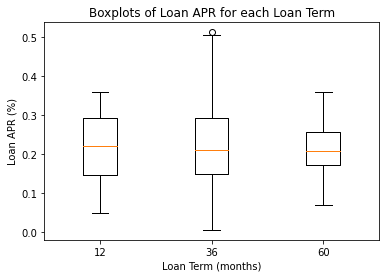

In [21]:
# Series of the BorrowerAPR value for each loan term
g2_12 = df[ df['Term'] == 12 ]['BorrowerAPR']
g2_36 = df[ df['Term'] == 36 ]['BorrowerAPR'].dropna()
g2_60 = df[ df['Term'] == 60 ]['BorrowerAPR']

# Put the individual series into a list for easier graphing
data = [g2_12, g2_36, g2_60]

# Plot a boxplot of the loan rates for each loan term
plt.boxplot(data, labels = [12, 36, 60])
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan APR (%)')
plt.title('Boxplots of Loan APR for each Loan Term');

Q: How does Credit Score affect Loan APR?

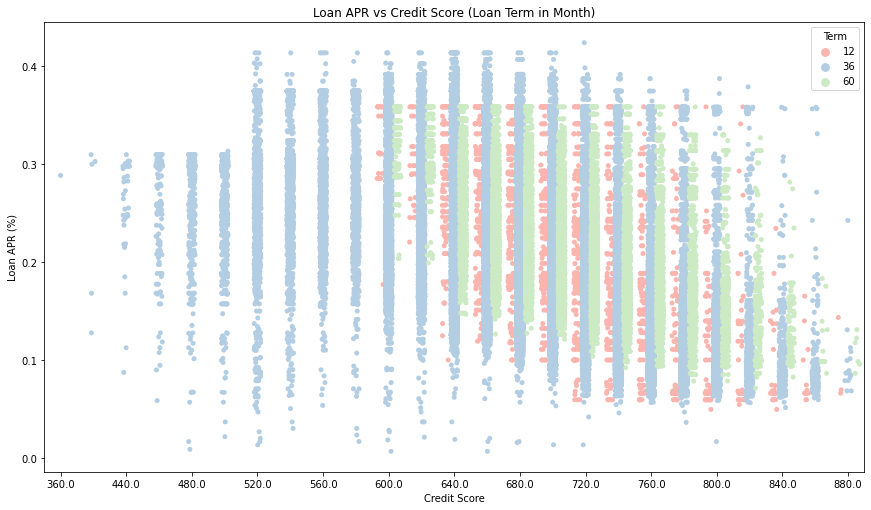

In [82]:
# Series of "CreditScoreRangeLower" and "BorrowerAPR" for realistic values of credit scores
g4_x = df[ df['CreditScoreRangeLower'] != 0 ]['CreditScoreRangeLower']
g4_y = df[ df['CreditScoreRangeLower'] != 0 ]['BorrowerAPR']
g4_z = df[ df['CreditScoreRangeLower'] != 0 ]['Term']

# Make figure larger
plt.figure(figsize = [14.7, 8.27])

# Seaborn scatter plot of 'g4_?' data above
sb.stripplot(x = g4_x, y = g4_y, hue = g4_z,
            dodge = True, jitter = 0.3, palette = "Pastel1")

plt.xlabel('Credit Score')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Credit Score (Loan Term in Month)');

# Get current xtick values
position, label = plt.xticks()

# Only show every second position and label
plt.xticks(position[::2], label[::2] );

For the above graph, there appears to be a minor downward trend of loan rate as the person's credit score increases.

Q: For the 36-month loans, does higher credit translate to a lower rate?

In [27]:
# Values with: Loan Term = 36 months, with realistic Credit Score values
g5_x = df[ (df['Term'] == 36) & (df['CreditScoreRangeLower'] >= 200) ]['CreditScoreRangeLower'].dropna()
g5_y = df[ (df['Term'] == 36) & (df['CreditScoreRangeLower'] >= 200) ]['BorrowerAPR']

# Make the two series into a DataFrame and add an Intercept
df_lsf = pd.concat([g5_x, g5_y], axis = 1)
df_lsf['intercept'] = 1

In [28]:
# Perform ther Linear Regression
lm = sm.OLS(df_lsf['BorrowerAPR'], df_lsf[['CreditScoreRangeLower', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BorrowerAPR   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:36:04   Log-Likelihood:             1.0056e+05
No. Observations:               87054   AIC:                        -2.011e+05
Df Residuals:                   87052   BIC:                        -2.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CreditScoreRangeLower    -0.0006   3.95e-06   -149.547      0.000      -0.001      -0.001
intercept                 0.6221      0.003    230.114      0.000       0.617       0.627
==============================================================================
Omnibus:                     5542.518   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4346.049
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       2.404   Cond. No.                     7.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

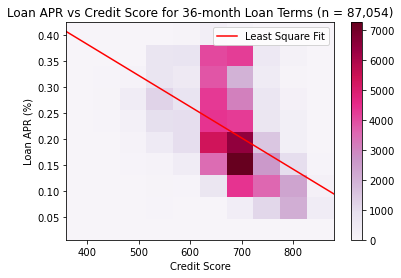

In [34]:
# Graph of Loan APR vs Credit Score, for loans of Term = 36 months.
g6_x = df_lsf['CreditScoreRangeLower']
g6_y = df_lsf['BorrowerAPR']

# x and y values for Linear Regression Line
x = np.linspace(360, 900, 100)
y = (-0.0006*x) + 0.6221

# 2D Histogram of "g6_?" data above
plt.hist2d(g6_x, g6_y, cmap = 'PuRd')

# Red line is least square fit regression.
plt.plot(x, y, color = 'r', label = 'Least Square Fit')

# Plot Polish
plt.xlabel('Credit Score')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Credit Score for 36-month Loan Terms (n = 87,054)')
plt.colorbar()
plt.legend();

For the above 2D histogram, there is a trend of decreasing loan rate as credit score raises.  Linear regression line makes the point clearer. 

Q: How does Loan Rate vary with respect to Risk Assessment Score?

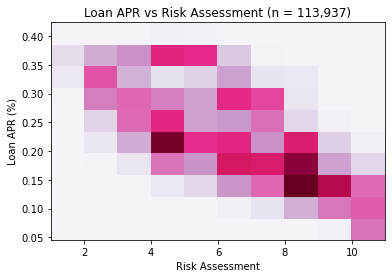

In [42]:
# Get "ProsperScore" and "BorrowerAPR" values that are valid
g7_x = df[ df['ProsperScore'] > 0 ]['ProsperScore']
g7_y = df[ df['ProsperScore'] > 0 ]['BorrowerAPR']

# 2D Histogram of "PropserScore" and "BorrowerAPR"
plt.hist2d(g7_x, g7_y, cmap = 'PuRd')
plt.xlabel('Risk Assessment')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Risk Assessment (n = 113,937)');

For the above graph, the trend is clearly down, loan rate decreases and risk assessment score increases.

Make the above graph into a boxplot

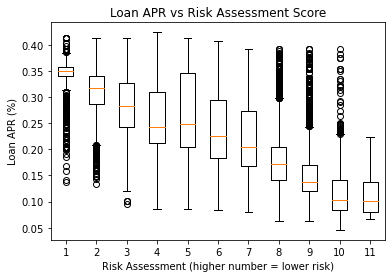

In [43]:
# Series of "BorrowerAPR" for each "ProsperScore" value
g7_1 = df[ df['ProsperScore'] == 1 ]['BorrowerAPR']
g7_2 = df[ df['ProsperScore'] == 2 ]['BorrowerAPR']
g7_3 = df[ df['ProsperScore'] == 3 ]['BorrowerAPR']
g7_4 = df[ df['ProsperScore'] == 4 ]['BorrowerAPR']
g7_5 = df[ df['ProsperScore'] == 5 ]['BorrowerAPR']
g7_6 = df[ df['ProsperScore'] == 6 ]['BorrowerAPR']
g7_7 = df[ df['ProsperScore'] == 7 ]['BorrowerAPR']
g7_8 = df[ df['ProsperScore'] == 8 ]['BorrowerAPR']
g7_9 = df[ df['ProsperScore'] == 9 ]['BorrowerAPR']
g7_10 = df[ df['ProsperScore'] == 10 ]['BorrowerAPR']
g7_11 = df[ df['ProsperScore'] == 11 ]['BorrowerAPR']

# Put above data into single list for easier graphing
data = [g7_1, g7_2, g7_3, g7_4, g7_5, g7_6, g7_7, g7_8, g7_9, g7_10, g7_11]

# Boxplot of Loan APR for each PropserScore value
plt.boxplot(data, labels = range(1,12))
plt.xlabel('Risk Assessment (higher number = lower risk)')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Risk Assessment Score');

For the above graph, the trend is very clear.  Higher Risk Assessment Score (lower risk) leads to significantly lower loan rates.

Q: How does Risk Assessment Score vary with respect to Credit Score?

In [45]:
# "CreditScore" and "ProsperScore" values for valid entries (i.e. Credit Score != 0 and valid ProsperScores (i.e. 1 - 11))
g8_x = df[ (df['CreditScoreRangeLower'] >= 200) & (df['ProsperScore'] >= 1) ]['CreditScoreRangeLower']
g8_y = df[ (df['CreditScoreRangeLower'] >= 200) & (df['ProsperScore'] >= 1) ]['ProsperScore']

Make a new, sliced dataframe and perform a linear regression on the selected values.

In [46]:
# Make dataframe and add intercept
df_rscs = pd.concat([g8_x, g8_y], axis = 1)
df_rscs['intercept'] = 1

# Perform linear regression
lm = sm.OLS(df_rscs['ProsperScore'], df_rscs[['CreditScoreRangeLower', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ProsperScore   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                 1.343e+04
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:50:59   Log-Likelihood:            -1.8762e+05
No. Observations:               84853   AIC:                         3.752e+05
Df Residuals:                   84851   BIC:                         3.753e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CreditScoreRangeLower     0.0187      0.000    115.867      0.000       0.018       0.019
intercept                -7.0939      0.113    -62.871      0.000      -7.315      -6.873
==============================================================================
Omnibus:                     3226.455   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1418.774
Skew:                          -0.024   Prob(JB):                    8.26e-309
Kurtosis:                       2.368   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

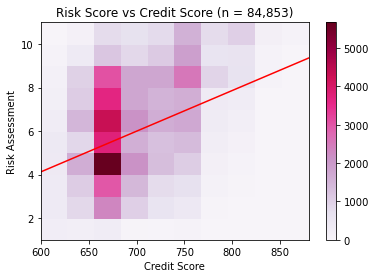

In [47]:
# Plot a 2D Histogram of the above data
plt.hist2d(g8_x, g8_y, cmap = 'PuRd');

plt.xlabel('Credit Score')
plt.ylabel('Risk Assessment')
plt.title('Risk Score vs Credit Score (n = 84,853)')
plt.colorbar();

# Make x and y values for linear regression line
x = np.linspace(600, 900, 100)
y = (0.0187*x) - 7.0939

# Plot linear regression line
plt.plot(x, y, color = 'r', label = 'Linear Regression Fit');

For the above graph, Although there are less number of people with higher credit score, the trend appears to be positvely correlated.

Q: What is relationship between Monthly Payments and Loan Amount?

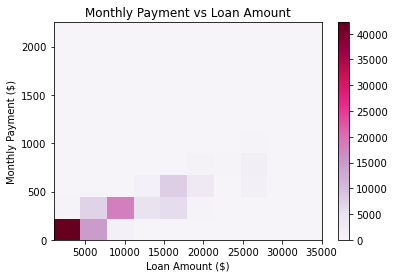

In [53]:
# Series of Loan Amount and Monthly Payment
g9_x = df['LoanOriginalAmount']
g9_y = df['MonthlyLoanPayment']

# 2D Histogram of the above data
plt.hist2d(g9_x, g9_y, cmap = 'PuRd')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Payment ($)')
plt.title('Monthly Payment vs Loan Amount')
plt.colorbar();

The above graph nicely shows the positive relationship between the two values.  Also shows that most loans are for smaller amounts.

Q: Do Homeowners have higher Credit Scores?

700.0
680.0


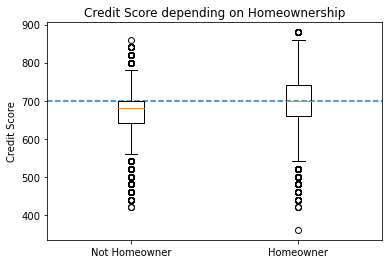

In [54]:
# Series of Credit Scores for Homeowners and Not Homeowners
g11_1 = df[ (df['IsBorrowerHomeowner'] == True) & (df['CreditScoreRangeLower'] > 0) ]['CreditScoreRangeLower']
g11_2 = df[ (df['IsBorrowerHomeowner'] == False) & (df['CreditScoreRangeLower'] > 0) ]['CreditScoreRangeLower'].dropna()

# Put above data into a list for easier graphing
data = [g11_2, g11_1]

# Print out the median credit score for homeowners and not homeowners
print(g11_1.median() )
print(g11_2.median() )

# Plot a horizontal line so it is eaiser to line up values
plt.axhline(700, ls = '--')

# Boxplot of credit scores for homeowner and not homeowners
plt.boxplot(data, labels = ['Not Homeowner', 'Homeowner'])
plt.ylabel('Credit Score')
plt.title('Credit Score depending on Homeownership');

From the above graph, the median homeowner credit score is 20 points higher than a non-homeowner.  Also, the bottom 50% of homeowners have nearly the same range of credit scores as the bottom 75% of non-homeowners, although the median credit score difference is only 20 points.

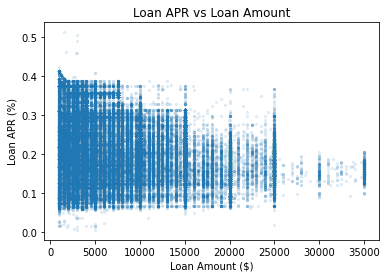

In [69]:
# What is the relationship between loan rate and amount borrowed?
g15_x = df[ df['BorrowerAPR'] > 0 ]['LoanOriginalAmount']
g15_y = df[ df['BorrowerAPR'] > 0 ]['BorrowerAPR']

plt.scatter(g15_x, g15_y, s = 5, alpha = 1/10)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Loan Amount');

# There appears to be a slight downward trend of loan rate as loan amount increases.  Also, the largest loans, >$25,000
# mostly fall between 0.1 and 0.2 %.  From an above graph (g14 x and y data), the lowest credit score for a person with
# a loan of $25,000 or above is 720.  So, larger loans have better credit score so they can get a lower rate.  Maybe on
# top of a lower rate just because the amount is larger.

Q: What is the relationship between loan rate and amount borrowed?

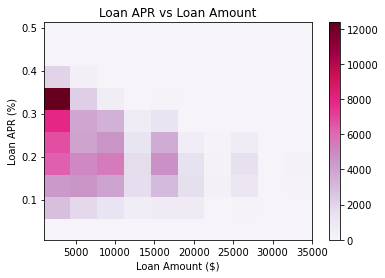

In [55]:
# Loan Amount and Loan Rate for valid values
g15_x = df[ df['BorrowerAPR'] > 0 ]['LoanOriginalAmount']
g15_y = df[ df['BorrowerAPR'] > 0 ]['BorrowerAPR']

# 2D Histogram of above values
plt.hist2d(g15_x, g15_y, cmap = 'PuRd')

plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan APR (%)')
plt.title('Loan APR vs Loan Amount')
plt.colorbar();

From the above graph, there appears to be a slight downward trend of loan rate as loan amount increases.  Also, the largest loans, more than 25,000 mostly fall between 0.1 and 0.2 percent.  From an above graph (g14 x and y data), the lowest credit score for a person with a loan of 25,000 or above is 720.  So, larger loans have better credit score so they can get a lower rate.  Maybe on top of a lower rate just because the amount is larger.

## Multivariate

Q: How do Monthly Payments and Loan Amount vary, with respect to Loan Term?

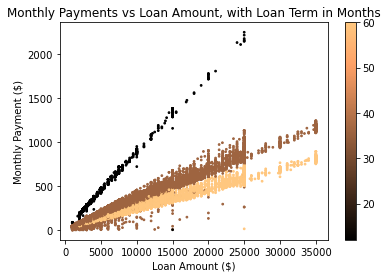

In [60]:
# Loan Amount, Monthly Payment, Loan Term
g3_x = df[ df['MonthlyLoanPayment'] != 0 ]['LoanOriginalAmount']
g3_y = df[ df['MonthlyLoanPayment'] != 0 ]['MonthlyLoanPayment']
g3_z = df[ df['MonthlyLoanPayment'] != 0 ]['Term']

# Scatter plot of the above three variables, Loan Term is in color
plt.scatter(g3_x, g3_y, c = g3_z, cmap = 'copper', s = 3)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Payment ($)')
plt.title('Monthly Payments vs Loan Amount, with Loan Term in Months')
plt.colorbar();

From the above graph, loan term is clear from the data.  Each of the three possibilities falls into a neat range.

Q: How do  Monthly Payments and Loan Amount vary, with respect to Loan Rate?

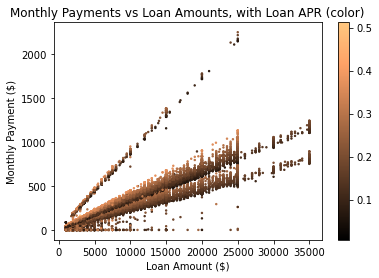

In [62]:
# Loan Amount, Monthly Payment, Loan APR
g2_x = df['LoanOriginalAmount']
g2_y = df['MonthlyLoanPayment']
g2_z = df['BorrowerAPR']

# Scatter plot of the above data, with Loan Rate in color
plt.scatter(g2_x, g2_y, c = g2_z, s = 2, cmap = 'copper')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Payment ($)')
plt.title('Monthly Payments vs Loan Amounts, with Loan APR (color)')
plt.colorbar();

From the above graph, the term lengths as noted in the previous (above) graph show up again.  For the 36 and 60 month loans, the darker values indicating a lower loan rate) mostly appear at the bottom of their respective trends.  This indicates that for a given amount borrowed, the lower rates pay lower monthly amounts.